## 0. Importieren der benötigten Libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Laden der Trainingsdaten

In [61]:
train = pd.read_csv('train.csv', sep=';')
train.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


## 2. kurze EDA

- Histogramm des Features 'customerType'

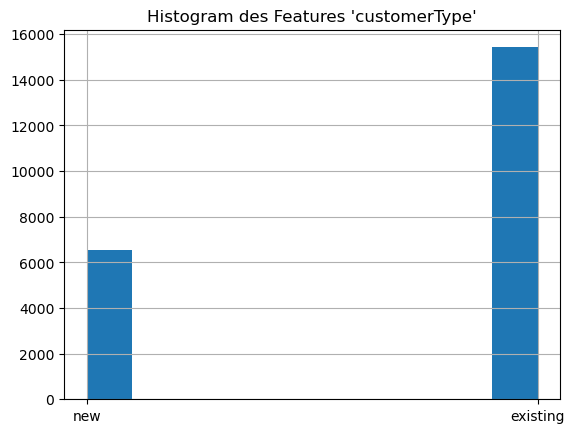

In [62]:
train['customerType'].hist()
plt.title("Histogram des Features 'customerType'")
plt.show()

- Histogramm des Features 'totalAmount'

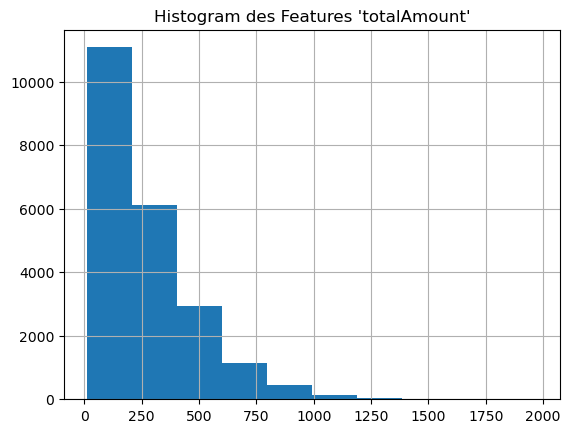

In [63]:
train['totalAmount'].hist()
plt.title("Histogram des Features 'totalAmount'")
plt.show()

- Histogramm des Labels über alle Daten

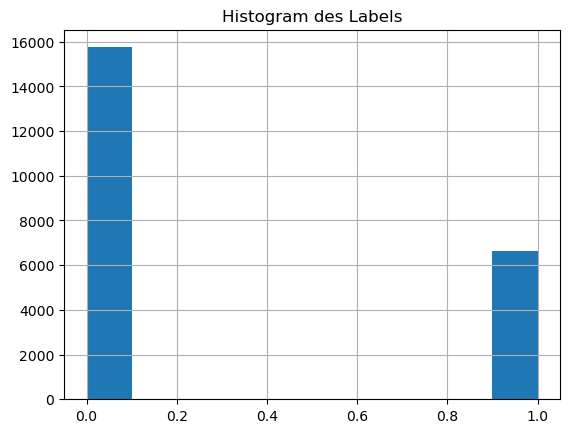

In [64]:
train['returnLabel'].hist()
plt.title("Histogram des Labels")
plt.show()

- Histogramm des Labels aufgeteilt nach 'customerType'

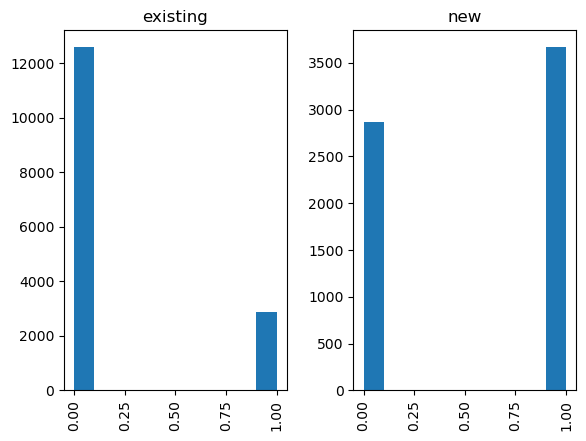

In [65]:
train.hist(column='returnLabel', by='customerType')
plt.show()

- Boxplot des Features 'totalAmount' aufgeteilt nach dem Label

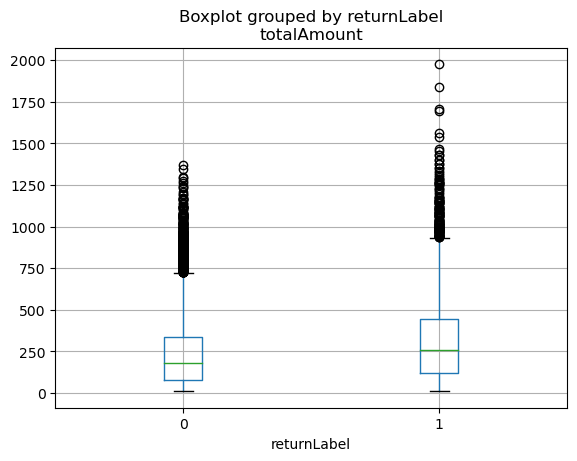

In [66]:
train.boxplot(column='totalAmount', by='returnLabel')
plt.show()

- displot mit Seaborn des Features 'totalAmount' aufgeteilt nach dem Label

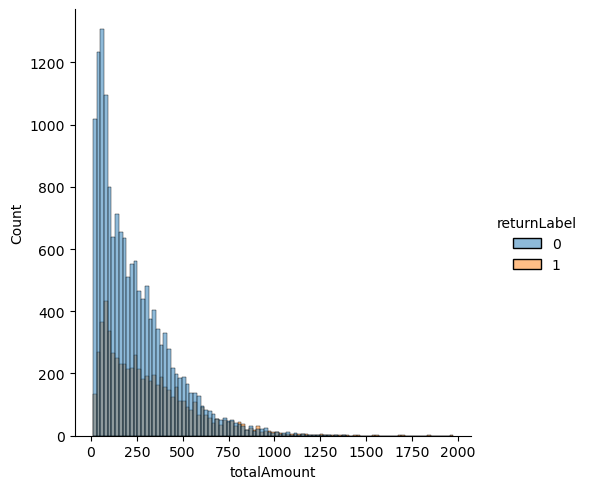

In [67]:
sns.displot(train, x='totalAmount', hue='returnLabel')
plt.show()

# 3. Auffüllen von fehlenden Trainingsdaten

- Feature 'basket'

In [68]:
print(train['basket'].isna().sum())

0


    ⟶ Feature 'basket' hat keine fehlenden Daten

- Feature 'customerType'

In [69]:
print('number of NaNs: ', train['customerType'].isna().sum())

number of NaNs:  442


    ⟶ Annahme: Bestellungen, die keinen Eintrag unter 'customerType' besitzen, sind Bestellungen ohne Account auf der Seite (Bestellung als Gast). Aus diesem Grund, werden die fehlenden Einträge mit dem Wert 'guest' gefüllt.

In [70]:
train['customerType'].fillna('unknown', inplace=True)

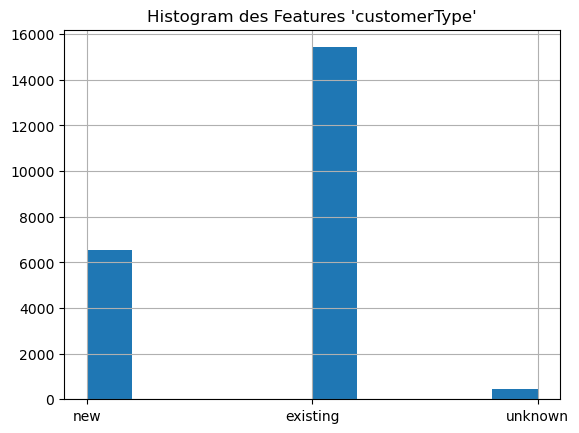

In [71]:
train['customerType'].hist()
plt.title("Histogram des Features 'customerType'")
plt.show()

- Feature 'total Amount'

In [72]:
print('number of NaNs: ', train['totalAmount'].isna().sum())

number of NaNs:  477


    ⟶ Da das Feature numerisch ist, können die fehlenden Werte mit dem Durchschnitt der zur Verfügung stehenden Werte gefüllt werden.

In [73]:
train['totalAmount'].fillna(train['totalAmount'].mean(), inplace=True)

- Überprüfung ob Zeilen ohne angegebenes Label existieren

In [74]:
print('number of NaNs: ', train['returnLabel'].isna().sum())

number of NaNs:  0


## 4. One-Hot-Encoding der kategorischen Features

In [75]:
train = pd.get_dummies(train, columns=['customerType'])
train.rename(columns={'customerType_existing': 'cT_existing'}, inplace=True)
train.rename(columns={'customerType_new': 'cT_new'}, inplace=True)
train.rename(columns={'customerType_unknown': 'cT_unknown'}, inplace=True)
train.head()

,transactionId,basket,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown
0,9534310106,"[4, 3, 4]",252.0,1,0,1,0
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0,1,0,0
2,2737331698,[5],84.0,0,1,0,0
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0,1,0,0


# 5. Bauen von neuen Features


- String Daten in 'basket' in eine Liste konvertieren

In [17]:
train['basket_short'] = train['basket'].str[1:-1]
train['basket_int'] = train['basket_short'].str.split(',').apply(lambda x: [int(i) for i in x])
train.drop(['basket', 'basket_short'], axis=1, inplace=True)
train.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int
0,9534310106,252.0,1,0,1,0,"[4, 3, 4]"
1,7202594767,70.0,0,1,0,0,"[4, 2, 0, 2, 5]"
2,2737331698,84.0,0,1,0,0,[5]
3,4868011733,116.0,0,1,0,0,"[1, 4, 2, 4]"
4,7622406570,378.0,0,1,0,0,"[2, 5, 3, 2, 3, 2, 0]"


- Gesamtanzahl von Artikeln im Warenkorb

In [18]:
train['basket_length'] = train['basket_int'].apply(lambda x: len(x))
train.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length
0,9534310106,252.0,1,0,1,0,"[4, 3, 4]",3
1,7202594767,70.0,0,1,0,0,"[4, 2, 0, 2, 5]",5
2,2737331698,84.0,0,1,0,0,[5],1
3,4868011733,116.0,0,1,0,0,"[1, 4, 2, 4]",4
4,7622406570,378.0,0,1,0,0,"[2, 5, 3, 2, 3, 2, 0]",7


- Anzahl der einzelnen Kategorien

In [19]:
train['basket_0'] = train['basket_int'].apply(lambda x: x.count(0))
train['basket_1'] = train['basket_int'].apply(lambda x: x.count(1))
train['basket_2'] = train['basket_int'].apply(lambda x: x.count(2))
train['basket_3'] = train['basket_int'].apply(lambda x: x.count(3))
train['basket_4'] = train['basket_int'].apply(lambda x: x.count(4))
train['basket_5'] = train['basket_int'].apply(lambda x: x.count(5))
train.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,9534310106,252.0,1,0,1,0,"[4, 3, 4]",3,0,0,0,1,2,0
1,7202594767,70.0,0,1,0,0,"[4, 2, 0, 2, 5]",5,1,0,2,0,1,1
2,2737331698,84.0,0,1,0,0,[5],1,0,0,0,0,0,1
3,4868011733,116.0,0,1,0,0,"[1, 4, 2, 4]",4,0,1,1,0,2,0
4,7622406570,378.0,0,1,0,0,"[2, 5, 3, 2, 3, 2, 0]",7,1,0,3,2,0,1


- Preis pro Buch

In [20]:
train['price_per_book'] = train['totalAmount'] / train['basket_length']
train.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,price_per_book
0,9534310106,252.0,1,0,1,0,"[4, 3, 4]",3,0,0,0,1,2,0,84.0
1,7202594767,70.0,0,1,0,0,"[4, 2, 0, 2, 5]",5,1,0,2,0,1,1,14.0
2,2737331698,84.0,0,1,0,0,[5],1,0,0,0,0,0,1,84.0
3,4868011733,116.0,0,1,0,0,"[1, 4, 2, 4]",4,0,1,1,0,2,0,29.0
4,7622406570,378.0,0,1,0,0,"[2, 5, 3, 2, 3, 2, 0]",7,1,0,3,2,0,1,54.0


- Anzahl an unterschiedlichen Kategorien

In [21]:
train['n_of_categories'] = train['basket_int'].apply(lambda x: len(set(x)))
train.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,price_per_book,n_of_categories
0,9534310106,252.0,1,0,1,0,"[4, 3, 4]",3,0,0,0,1,2,0,84.0,2
1,7202594767,70.0,0,1,0,0,"[4, 2, 0, 2, 5]",5,1,0,2,0,1,1,14.0,4
2,2737331698,84.0,0,1,0,0,[5],1,0,0,0,0,0,1,84.0,1
3,4868011733,116.0,0,1,0,0,"[1, 4, 2, 4]",4,0,1,1,0,2,0,29.0,3
4,7622406570,378.0,0,1,0,0,"[2, 5, 3, 2, 3, 2, 0]",7,1,0,3,2,0,1,54.0,4


# 6. Standart Scaler

- Neues Dataframe in dem nur die benötigten Features und das Label ist

In [22]:
features = train.drop(['basket_int', 'transactionId', 'returnLabel'], axis=1)
label = train['returnLabel']
features.head()

,totalAmount,cT_existing,cT_new,cT_unknown,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,price_per_book,n_of_categories
0,252.0,0,1,0,3,0,0,0,1,2,0,84.0,2
1,70.0,1,0,0,5,1,0,2,0,1,1,14.0,4
2,84.0,1,0,0,1,0,0,0,0,0,1,84.0,1
3,116.0,1,0,0,4,0,1,1,0,2,0,29.0,3
4,378.0,1,0,0,7,1,0,3,2,0,1,54.0,4


- Standart Scaler 

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)
features_scaled

array([[-0.03282349, -1.48725587,  1.55861197, ..., -0.64410553,
         0.85649359, -0.6931025 ],
       [-0.87945944,  0.67237926, -0.64159651, ...,  0.52709049,
        -1.34375521,  0.7748213 ],
       [-0.8143336 ,  0.67237926, -0.64159651, ...,  0.52709049,
         0.85649359, -1.4270644 ],
       ...,
       [-0.04677903, -1.48725587,  1.55861197, ..., -0.64410553,
         0.82506147,  0.0408594 ],
       [-0.83294098,  0.67237926, -0.64159651, ...,  2.86948253,
        -1.46948371,  1.50878319],
       [ 1.08361952, -1.48725587,  1.55861197, ..., -0.64410553,
         2.0823465 ,  0.0408594 ]])

# 7. Modelltraining

- Logistische Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [25]:
c = [0.1,1,4,5,6,10,30,100]
penalties = ['l1', 'l2']

best_logreg_score = 0
best_logreg_penalty = ''
best_logreg_c = 0
best_logreg_model = None

for penalty in penalties:
    for c_value in c:
        clf = LogisticRegression(
            penalty=penalty, C=c_value, solver='liblinear')
        scores = cross_val_score(clf, features_scaled, label, cv=5)
        print('penalty: ', penalty,
               ' c: ', c_value, ' score: ', scores.mean())
        
        if scores.mean() > best_logreg_score:
            best_logreg_score = scores.mean()
            best_logreg_penalty = penalty
            best_logreg_c = c_value
            best_logreg_model = clf

print('best score: ', best_logreg_score,
       ' best penalty: ', best_logreg_penalty, ' best c: ', best_logreg_c)

penalty:  l1  c:  0.1  score:  0.8795089285714285
penalty:  l1  c:  1  score:  0.879732142857143
penalty:  l1  c:  4  score:  0.8799107142857144
penalty:  l1  c:  5  score:  0.8799107142857144
penalty:  l1  c:  6  score:  0.8799107142857144
penalty:  l1  c:  10  score:  0.8798660714285715
penalty:  l1  c:  30  score:  0.8798214285714285
penalty:  l1  c:  100  score:  0.8798214285714285
penalty:  l2  c:  0.1  score:  0.8794642857142858
penalty:  l2  c:  1  score:  0.8797767857142856
penalty:  l2  c:  4  score:  0.8799107142857144
penalty:  l2  c:  5  score:  0.8799107142857144
penalty:  l2  c:  6  score:  0.8799107142857144
penalty:  l2  c:  10  score:  0.8799107142857144
penalty:  l2  c:  30  score:  0.8798660714285715
penalty:  l2  c:  100  score:  0.8798214285714285
best score:  0.8799107142857144  best penalty:  l1  best c:  4


- Random Forest

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

n_estimators = [60,80,100,120,140]
max_depth = [2, 4, 6]

best_rf_score = 0
best_rf_n_estimators = 0
best_rf_max_depth = 0
best_rf_model = None

for n_estimator in n_estimators:
    for depth in max_depth:
        clf = RandomForestClassifier(
            n_estimators=n_estimator, max_depth=depth)
        scores = cross_val_score(clf, features, label, cv=5)
        print('n_estimator: ', n_estimator,
               ' depth: ', depth, ' score: ', scores.mean())
        
        if scores.mean() > best_rf_score:
            best_rf_score = scores.mean()
            best_rf_n_estimators = n_estimator
            best_rf_max_depth = depth
            best_rf_model = clf

print('best score: ', best_rf_score,' best n_estimator: ', best_rf_n_estimators,
       ' best depth: ', best_rf_max_depth)

n_estimator:  60  depth:  2  score:  0.8060267857142858
n_estimator:  60  depth:  4  score:  0.8608928571428571
n_estimator:  60  depth:  6  score:  0.8687946428571429
n_estimator:  80  depth:  2  score:  0.8055357142857144
n_estimator:  80  depth:  4  score:  0.8610714285714286
n_estimator:  80  depth:  6  score:  0.8708482142857144
n_estimator:  100  depth:  2  score:  0.8075446428571429
n_estimator:  100  depth:  4  score:  0.8617857142857142
n_estimator:  100  depth:  6  score:  0.8705357142857142
n_estimator:  120  depth:  2  score:  0.8034821428571428
n_estimator:  120  depth:  4  score:  0.8604910714285715
n_estimator:  120  depth:  6  score:  0.8701785714285715
n_estimator:  140  depth:  2  score:  0.8060714285714287
n_estimator:  140  depth:  4  score:  0.8607142857142858
n_estimator:  140  depth:  6  score:  0.8704017857142858
best score:  0.8708482142857144  best n_estimator:  80  best depth:  6


- Gradient Boosting Tree

In [265]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

n_estimators = [60,80,100,120,140]
max_depth = [2, 4, 6]

best_gb_score = 0
best_gb_n_estimators = 0
best_gb_max_depth = 0
best_gb_model = None

for n_estimator in n_estimators:
    for depth in max_depth:
        clf = GradientBoostingClassifier(
            n_estimators=n_estimator, max_depth=depth)
        scores = cross_val_score(clf, features, label, cv=5)
        print('n_estimator: ', n_estimator,
               ' depth: ', depth, ' score: ', scores.mean())
        
        if scores.mean() > best_gb_score:
            best_gb_score = scores.mean()
            best_gb_n_estimators = n_estimator
            best_gb_max_depth = depth
            best_gb_model = clf

print('best score: ', best_gb_score,' best n_estimator: ', best_gb_n_estimators,
         ' best depth: ', best_gb_max_depth)


n_estimator:  60  depth:  2  score:  0.8770982142857143
n_estimator:  60  depth:  4  score:  0.8801785714285714
n_estimator:  60  depth:  6  score:  0.8786160714285713
n_estimator:  80  depth:  2  score:  0.8787946428571427
n_estimator:  80  depth:  4  score:  0.8804464285714285
n_estimator:  80  depth:  6  score:  0.8794196428571428
n_estimator:  100  depth:  2  score:  0.8802232142857143
n_estimator:  100  depth:  4  score:  0.8809821428571428
n_estimator:  100  depth:  6  score:  0.878125
n_estimator:  120  depth:  2  score:  0.8804464285714285
n_estimator:  120  depth:  4  score:  0.8804464285714285
n_estimator:  120  depth:  6  score:  0.8782589285714286
n_estimator:  140  depth:  2  score:  0.8805803571428571
n_estimator:  140  depth:  4  score:  0.8802232142857143
n_estimator:  140  depth:  6  score:  0.8784375000000001
best score:  0.8809821428571428  best n_estimator:  100  best depth:  4


- Trainieren des jeweils besten Modells

In [266]:
best_logreg_model.fit(features_scaled, label)
best_rf_model.fit(features_scaled, label)
best_gb_model.fit(features_scaled, label)

GradientBoostingClassifier(max_depth=4)

# 8. Laden der Testdaten

In [267]:
test = pd.read_csv('test.csv', sep=';')
test.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0


# 9. Entfernen der unvollständigen Zeilen

- Nicht angegebene Customer Typen werden als unbekannt markiert und nicht entfernt

In [268]:
test['customerType'].fillna('unknown', inplace=True)

In [269]:
test.dropna(inplace=True)

# 10. Transformieren der Attribute

- Onehot-Encoding des Features 'CustomerType'

In [270]:
test = pd.get_dummies(test, columns=['customerType'])
test.rename(columns={'customerType_existing': 'cT_existing'}, inplace=True)
test.rename(columns={'customerType_new': 'cT_new'}, inplace=True)
test.rename(columns={'customerType_unknown': 'cT_unknown'}, inplace=True)
test.head()

,transactionId,basket,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown
0,4132523932,"[4, 3, 4, 3, 2, 3]",366.0,1,1,0,0
1,8998574539,"[3, 4, 4, 3, 5]",85.0,0,1,0,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",275.0,0,1,0,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",528.0,0,1,0,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",287.0,0,1,0,0


- String Daten in 'basket' in eine Liste konvertieren

In [271]:
test['basket_short'] = test['basket'].str[1:-1]
test['basket_int'] = test['basket_short'].str.split(',').apply(lambda x: [int(i) for i in x])
test.drop(['basket', 'basket_short'], axis=1, inplace=True)
test.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int
0,4132523932,366.0,1,1,0,0,"[4, 3, 4, 3, 2, 3]"
1,8998574539,85.0,0,1,0,0,"[3, 4, 4, 3, 5]"
2,9346688547,275.0,0,1,0,0,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]"
3,4533897707,528.0,0,1,0,0,"[3, 2, 2, 1, 5, 1, 1, 0]"
4,3334800500,287.0,0,1,0,0,"[4, 2, 3, 5, 2, 5, 1]"


- Gesamtanzahl von Arktikeln im Warenkorb

In [272]:
test['basket_length'] = test['basket_int'].apply(lambda x: len(x))
test.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length
0,4132523932,366.0,1,1,0,0,"[4, 3, 4, 3, 2, 3]",6
1,8998574539,85.0,0,1,0,0,"[3, 4, 4, 3, 5]",5
2,9346688547,275.0,0,1,0,0,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",11
3,4533897707,528.0,0,1,0,0,"[3, 2, 2, 1, 5, 1, 1, 0]",8
4,3334800500,287.0,0,1,0,0,"[4, 2, 3, 5, 2, 5, 1]",7


- Anzahl der einzelnen Kategorien

In [273]:
test['basket_0'] = test['basket_int'].apply(lambda x: x.count(0))
test['basket_1'] = test['basket_int'].apply(lambda x: x.count(1))
test['basket_2'] = test['basket_int'].apply(lambda x: x.count(2))
test['basket_3'] = test['basket_int'].apply(lambda x: x.count(3))
test['basket_4'] = test['basket_int'].apply(lambda x: x.count(4))
test['basket_5'] = test['basket_int'].apply(lambda x: x.count(5))
test.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,4132523932,366.0,1,1,0,0,"[4, 3, 4, 3, 2, 3]",6,0,0,1,3,2,0
1,8998574539,85.0,0,1,0,0,"[3, 4, 4, 3, 5]",5,0,0,0,2,2,1
2,9346688547,275.0,0,1,0,0,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",11,1,4,2,2,2,0
3,4533897707,528.0,0,1,0,0,"[3, 2, 2, 1, 5, 1, 1, 0]",8,1,3,2,1,0,1
4,3334800500,287.0,0,1,0,0,"[4, 2, 3, 5, 2, 5, 1]",7,0,1,2,1,1,2


- Preis pro Buch

In [274]:
test['price_per_book'] = test['totalAmount'] / test['basket_length']
test.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,price_per_book
0,4132523932,366.0,1,1,0,0,"[4, 3, 4, 3, 2, 3]",6,0,0,1,3,2,0,61.0
1,8998574539,85.0,0,1,0,0,"[3, 4, 4, 3, 5]",5,0,0,0,2,2,1,17.0
2,9346688547,275.0,0,1,0,0,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",11,1,4,2,2,2,0,25.0
3,4533897707,528.0,0,1,0,0,"[3, 2, 2, 1, 5, 1, 1, 0]",8,1,3,2,1,0,1,66.0
4,3334800500,287.0,0,1,0,0,"[4, 2, 3, 5, 2, 5, 1]",7,0,1,2,1,1,2,41.0


- Anzahl von unterschiedlichen Kategorien

In [275]:
test['n_of_categories'] = test['basket_int'].apply(lambda x: len(set(x)))
test.head()

,transactionId,totalAmount,returnLabel,cT_existing,cT_new,cT_unknown,basket_int,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,price_per_book,n_of_categories
0,4132523932,366.0,1,1,0,0,"[4, 3, 4, 3, 2, 3]",6,0,0,1,3,2,0,61.0,3
1,8998574539,85.0,0,1,0,0,"[3, 4, 4, 3, 5]",5,0,0,0,2,2,1,17.0,3
2,9346688547,275.0,0,1,0,0,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",11,1,4,2,2,2,0,25.0,5
3,4533897707,528.0,0,1,0,0,"[3, 2, 2, 1, 5, 1, 1, 0]",8,1,3,2,1,0,1,66.0,5
4,3334800500,287.0,0,1,0,0,"[4, 2, 3, 5, 2, 5, 1]",7,0,1,2,1,1,2,41.0,5


- Nicht verwendete Features entfernen und Fetures und Label splitten

In [276]:
features_test = test.drop(['basket_int', 'transactionId', 'returnLabel'], axis=1)
label_test = test['returnLabel']
features_test.head()

,totalAmount,cT_existing,cT_new,cT_unknown,basket_length,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5,price_per_book,n_of_categories
0,366.0,1,0,0,6,0,0,1,3,2,0,61.0,3
1,85.0,1,0,0,5,0,0,0,2,2,1,17.0,3
2,275.0,1,0,0,11,1,4,2,2,2,0,25.0,5
3,528.0,1,0,0,8,1,3,2,1,0,1,66.0,5
4,287.0,1,0,0,7,0,1,2,1,1,2,41.0,5


# 11. Skalierung der Fetures mit dem gleichen Scaler 

In [277]:
features_test_scaled = scaler.transform(features_test)

# 12. Predictions auf den Testdaten mit den besten Modellen

In [278]:
predictions_logreg_test = best_logreg_model.predict(features_test_scaled)
predictions_rf_test = best_rf_model.predict(features_test_scaled)
predictions_gb_test = best_gb_model.predict(features_test_scaled)

predictions_logreg_train = best_logreg_model.predict(features_scaled)
predictions_rf_train = best_rf_model.predict(features_scaled)
predictions_gb_train = best_gb_model.predict(features_scaled)

# 13 + 14. Berechnung von Accuracy, Precision und Recall der Modelle auf den Testdaten und Accuracy auf Trainingsdaten

In [279]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Logistic Regression')
print('Accuracy Test: ', accuracy_score(label_test, predictions_logreg_test), 
      ' Accuracy Train: ', accuracy_score(label, predictions_logreg_train))
print('Precision: ', precision_score(label_test, predictions_logreg_test))
print('Recall: ', recall_score(label_test, predictions_logreg_test))


print()
print('Random Forest')
print('Accuracy: ', accuracy_score(label_test, predictions_rf_test),
      ' Accuracy Train: ', accuracy_score(label, predictions_rf_train))
print('Precision: ', precision_score(label_test, predictions_rf_test))
print('Recall: ', recall_score(label_test, predictions_rf_test))


print()
print('Gradient Boosting')
print('Accuracy: ', accuracy_score(label_test, predictions_gb_test),
      ' Accuracy Train: ', accuracy_score(label, predictions_gb_train))
print('Precision: ', precision_score(label_test, predictions_gb_test))
print('Recall: ', recall_score(label_test, predictions_gb_test))

Logistic Regression
Accuracy Test:  0.8742705570291777  Accuracy Train:  0.8805803571428571
Precision:  0.8130518234165067
Recall:  0.7521306818181818

Random Forest
Accuracy:  0.8603713527851459  Accuracy Train:  0.8725
Precision:  0.8083881578947368
Recall:  0.6981534090909091

Gradient Boosting
Accuracy:  0.8763925729442971  Accuracy Train:  0.8883035714285714
Precision:  0.8085981308411215
Recall:  0.7681107954545454


    ⟶ Bei allen drei Modellen ist die Accuracy auf den Trainingsdaten leicht höher als auf den Testdaten. Dies spricht dafür, dass ein guter Bias-Variance-Tradeoff erreicht wurde und kein Overfiiting vorliegt.

# 15. Suche von Datenpunkten die von allen drei Modellen falsch klassifisziert wurden

- 1. Indezes der falschen Vorhersagen der einzelnen Modelle

In [280]:
wrong_predictions_logreg = label_test[label_test != predictions_logreg_test].index
wrong_predictions_rf = label_test[label_test != predictions_rf_test].index
wrong_predictions_gb = label_test[label_test != predictions_gb_test].index

- 2. Schnittmenge der falschen Vorhersagen

In [281]:
print('Number of false predictions Logistic Regression: ', len(wrong_predictions_logreg))
print('Number of false predictions Random Forest: ', len(wrong_predictions_rf))
print('Number of false predictions Gradient Boosting: ', len(wrong_predictions_gb))

print('Number of common false predictions: ', 
      len(set(wrong_predictions_logreg) & set(wrong_predictions_rf) & set(wrong_predictions_gb)))

Number of false predictions Logistic Regression:  1185
Number of false predictions Random Forest:  1316
Number of false predictions Gradient Boosting:  1165
Number of common false predictions:  899
